In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
plt.style.use('dark_background')

In [3]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)
print(f"The dimension of the dataset is - {df.shape}")

The dimension of the dataset is - (200, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
X = df.iloc[:, 3:5].values

## Using the elbow method to find the optimal number of clusters

Text(0, 0.5, 'WCSS')

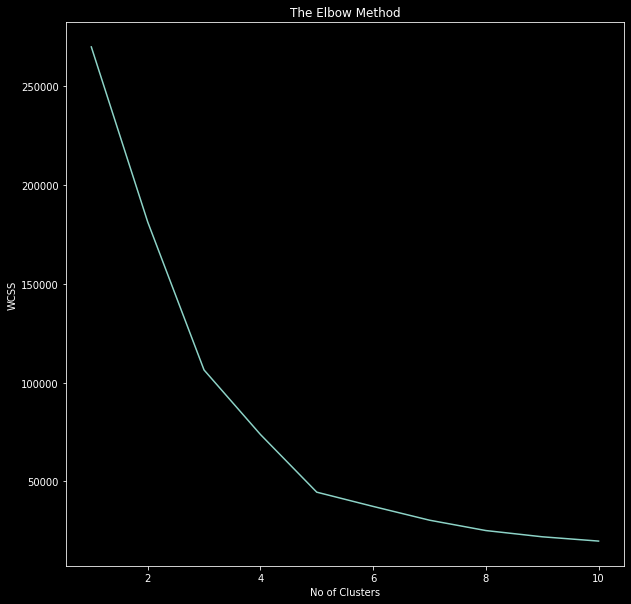

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    random_state = 42
                   )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
figure = plt.figure(figsize = (10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters = 5, 
                init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

## Visualising the clusters

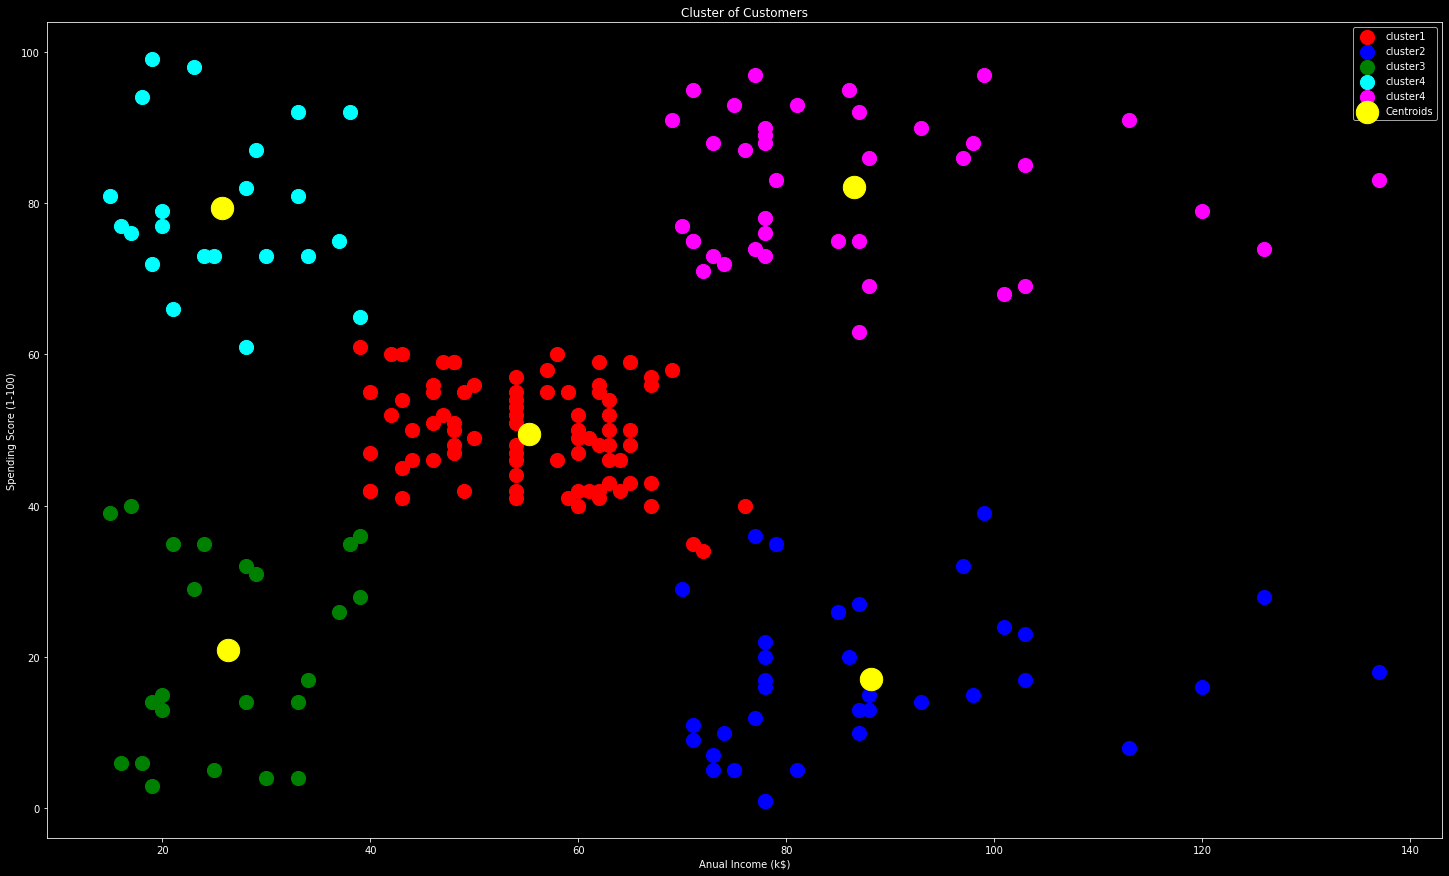

In [12]:
figure = plt.figure(figsize = (25,15))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 200, c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],  s = 200, c = 'blue', label = 'cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],  s = 200, c = 'green', label = 'cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],  s = 200, c = 'cyan', label = 'cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],  s = 200, c = 'magenta', label = 'cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 500, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()